We work with histograms and density plots.

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [2]:
# Path of the file to read
iris_filepath = "../data/iris.csv"

# Read the file into a variable iris_data
iris_data = pd.read_csv(iris_filepath, index_col="Id")

# Print the first 5 rows of the data
iris_data.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## Histograms

We would like to create a histogram to see how petal length varies in iris flowers. We can do this with the `sns.distplot` command.
We customize the behavior of the command with two additional pieces of information:
* `a=` chooses the column we'd like to plot (*in this case, we chose `Petal Length (cm)`*).
* `kde=False` is something we'll always provide when creating a histogram, as leaving it out will create a slightly different plot

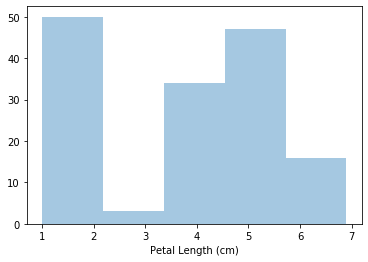

In [3]:
# Histogram 
sns.distplot(a=iris_data['Petal Length (cm)'], kde=False)


## Density plots

The next type of plot is a kernel density estimate (KDE) plot. In case you're not familiar with KDE plots, you can think of it as a smoothed histogram.

To make a KDE plot, we use the `sns.kdeplot` command. Setting `shade=True` colors the area below the curve (and `data=` has identical functionality as the histogram above)

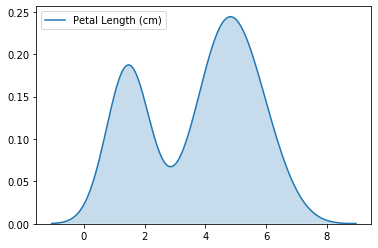

In [4]:
# KDE plot 
sns.kdeplot(data=iris_data['Petal Length (cm)'], shade=True)

## 2D KDE plots

We can create a two-dimensional KDE plot with the `sns.jointplot` command.

In the plow below, color-coding shows us how likely we are to see different combinations of sepal width and petal length, where darker parts of the figure are more likely. 

Note that in addition to the 2D KDE plot in the center,
* the curve at the top of the figure is a KDE plot for the data on the x-axis (in this case, `iris_data['Petal Length (cm)']`), and
* the curve on the right of the figure is a KDE plot for the data on the y-axis (in this case, `iris_data['Sepal Width (cm)']`).

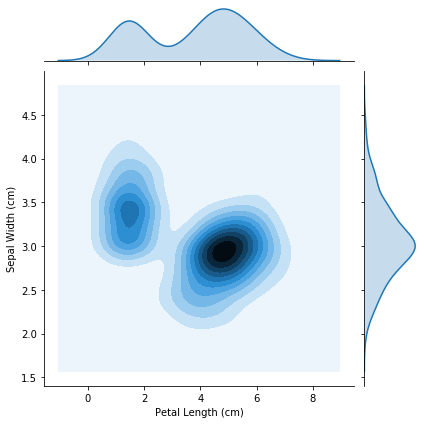

In [5]:
# 2D KDE plot
sns.jointplot(x=iris_data['Petal Length (cm)'], y=iris_data['Sepal Width (cm)'], kind="kde")

## Color-Coded Plots

We create plots to understand differences between the species. To accomplish this, we begin by breaking the dataset into three separate files, with one for each species.

In [6]:
# Paths of the files to read
iris_set_filepath = "../data/iris_setosa.csv"
iris_ver_filepath = "../data/iris_versicolor.csv"
iris_vir_filepath = "../data/iris_virginica.csv"

# Read the files into variables 
iris_set_data = pd.read_csv(iris_set_filepath, index_col="Id")
iris_ver_data = pd.read_csv(iris_ver_filepath, index_col="Id")
iris_vir_data = pd.read_csv(iris_vir_filepath, index_col="Id")

# Print the first 5 rows of the Iris versicolor data
iris_ver_data.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
51,7.0,3.2,4.7,1.4,Iris-versicolor
52,6.4,3.2,4.5,1.5,Iris-versicolor
53,6.9,3.1,4.9,1.5,Iris-versicolor
54,5.5,2.3,4.0,1.3,Iris-versicolor
55,6.5,2.8,4.6,1.5,Iris-versicolor


In the code cell below, we create a different histogram for each species by using the `sns.distplot` command (as above) three times. We use `label=` to set how each histogram will appear in the legend.

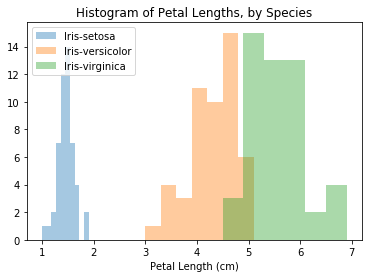

In [7]:
# Histograms for each species
sns.distplot(a=iris_set_data['Petal Length (cm)'], label="Iris-setosa", kde=False)
sns.distplot(a=iris_ver_data['Petal Length (cm)'], label="Iris-versicolor", kde=False)
sns.distplot(a=iris_vir_data['Petal Length (cm)'], label="Iris-virginica", kde=False)

# Add title
plt.title("Histogram of Petal Lengths, by Species")

# Force legend to appear
plt.legend()

We can also create a KDE plot for each species by using `sns.kdeplot` (as above). Again, `label=` is used to set the values in the legend.

Text(0.5, 1.0, 'Distribution of Petal Lengths, by Species')

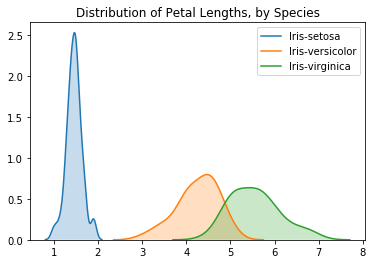

In [8]:
# KDE plots for each species
sns.kdeplot(data=iris_set_data['Petal Length (cm)'], label="Iris-setosa", shade=True)
sns.kdeplot(data=iris_ver_data['Petal Length (cm)'], label="Iris-versicolor", shade=True)
sns.kdeplot(data=iris_vir_data['Petal Length (cm)'], label="Iris-virginica", shade=True)

# Add title
plt.title("Distribution of Petal Lengths, by Species")

One interesting pattern that can be seen in plots is that the plants seem to belong to one of two groups, where Iris versicolor and Iris virginica seem to have similar values for petal length, while Iris setosa belongs in a category all by itself.

In fact, according to this dataset, we might even be able to classify any iris plant as Iris setosa (as opposed to Iris versicolor or Iris virginica) just by looking at the petal length: if the petal length of an iris flower is less than 2 cm, it's most likely to be Iris setosa!

## Scenario

We work with a real-world dataset containing information collected from microscopic images of breast cancer tumors.
Each tumor has been labeled as either benign (noncancerous) or malignant (cancerous).

In the datasets, each row corresponds to a different image.  
Each dataset has 31 different columns, corresponding to:
- 1 column (`'Diagnosis'`) that classifies tumors as either benign (which appears in the dataset as **`B`**) or malignant (__`M`__), and
- 30 columns containing different measurements collected from the images.


In [9]:
# Paths of the files to read
cancer_b_filepath = "../data/cancer_b.csv"
cancer_m_filepath = "../data/cancer_m.csv"

# Fill in the line below to read the (benign) file into a variable cancer_b_data
cancer_b_data = pd.read_csv(cancer_b_filepath, index_col="Id")

# Fill in the line below to read the (malignant) file into a variable cancer_m_data
cancer_m_data = pd.read_csv(cancer_m_filepath, index_col="Id")

In [10]:
cancer_b_data.head()


,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
Id,,,,,,,,,,,,,,,,,,,,,
8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [11]:
cancer_m_data.head()

,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
Id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Investigating differences

We create two histograms that show the distribution in values for 'Area (mean)' for both benign and malignant tumors.

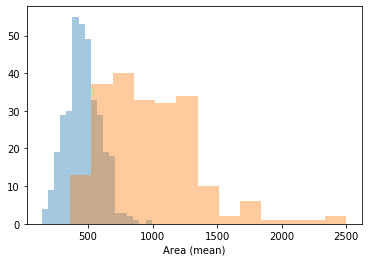

In [12]:
# Histograms for benign and maligant tumors
sns.distplot(a=cancer_b_data['Area (mean)'], kde=False)
sns.distplot(a=cancer_m_data['Area (mean)'], kde=False)

From the histogram above:
* Malignant tumors have higher values for 'Area (mean)', on average. 
* Malignant tumors have a larger range of potential values.

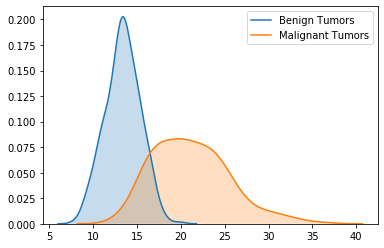

In [13]:
# KDE plots for benign and malignant tumors
sns.kdeplot(data=cancer_b_data['Radius (worst)'], label="Benign Tumors", shade=True)
sns.kdeplot(data=cancer_m_data['Radius (worst)'], label="Malignant Tumors", shade=True)

Q: A hospital has recently started using an algorithm that can diagnose tumors with high accuracy. Given a tumor with a value for `'Radius (worst)'` of 25, do you think the algorithm is more likely to classify the tumor as benign or malignant?

Sol: The algorithm is more likely to classify the tumor as malignant. This is because the curve for malignant tumors is much higher than the curve for benign tumors around a value of 25 -- and an algorithm that gets high accuracy is likely to make decisions based on this pattern in the data.